# Análise de Dados de Florianópolis e região com Foursquare

## Importação das bibliotecas

In [1]:
import gmplot
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline

## Carregando as bases de dados

In [2]:
fln_df = pd.read_csv('Foursquare-Data/Foursquare_FLN_2017.csv', encoding = 'utf-8')

## Fazendo perguntas

### O que tem no arquivo?

In [3]:
fln_df.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1483228882,-120,female,4ce08448c4f6a35d1184d66c,-27.739711,-48.637432,Palhoça,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,112,8.2
1,1483228906,-120,male,54496762498e336b4df13681,-27.578779,-48.583780,none,Brazil,4e67e38e036454776db1fb3a,Residence,4bf58dd8d48988d103941735,Home (private),0,0,none
2,1483229028,-120,female,4f91fecfe4b04c93d61a19c3,-27.628102,-48.665849,none,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d186941735,Liquor Store,0,9,7.5
3,1483229568,-120,female,5852f1e3809a770330967350,-27.437972,-48.493862,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,52e81612bcbc57f1066b7a0d,Beach Bar,0,69,8.8
4,1483233288,-120,male,5778520d498e65da2710f6ca,-27.594466,-48.573766,none,Brazil,4e67e38e036454776db1fb3a,Residence,4bf58dd8d48988d103941735,Home (private),0,0,none
5,1483241400,-120,male,4c2a3f439a559c74b4e80ce2,-27.593597,-48.559451,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11f941735,Nightclub,0,504,8.4
6,1483241415,-120,female,5843088e9e3d773ecae1fba6,-27.564293,-48.623853,São José,Brazil,4e67e38e036454776db1fb3a,Residence,4bf58dd8d48988d103941735,Home (private),0,0,none
7,1483242706,-120,female,4d1b8a75c17ff04d6a55bf41,-27.599229,-48.430444,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,0,122,7.2
8,1483244900,-120,female,56fd9db9498e9bdf16d92f6e,-27.657302,-48.694050,none,Brazil,4e67e38e036454776db1fb3a,Residence,4bf58dd8d48988d103941735,Home (private),0,0,none
9,1483250127,-120,female,4ea39af50cd6fc5af3e13be1,-27.451959,-48.450642,Florianópolis,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4f2a25ac4b909258e854f55f,Neighborhood,0,10,none


### São quantos check-ins?

In [4]:
len(fln_df)

1136

### Quantos locais existem nestes check-ins?

In [5]:
len(fln_df["VENUE ID"].unique())

511

### Quantos check-ins de cada gênero?

In [6]:
gender_total = pd.value_counts(fln_df["USER GENDER"], sort = True)
gender_total

female    660
male      429
none       47
Name: USER GENDER, dtype: int64

Text(0,0.5,'# Check-ins')

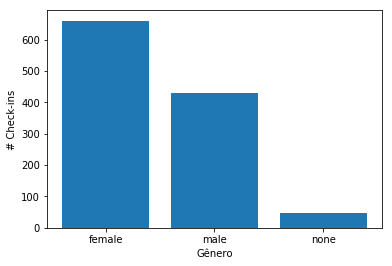

In [7]:
plt.bar(gender_total.keys(), gender_total)
plt.xlabel("Gênero")
plt.ylabel("# Check-ins")

### Como estão distribuídos estes check-ins pela cidade?

**Observação**: os **mapas .html** gerados pelo **gmplot** não podem ser abertos diretamente pelo **Jupyter** (ocorre um erro). Desta forma, os mesmos devem ser abertos em um browser de sua preferência.

In [8]:
gmap = gmplot.GoogleMapPlotter(-27.616175,-48.482675, 10)

In [9]:
lats_total = fln_df["VENUE LATITUDE"]
long_total = fln_df["VENUE LONGITUDE"]
gmap.heatmap(lats_total, long_total)
gmap.draw("Maps/heatmap_total.html")

### De que categorias são estes check-ins?

In [10]:
categories_total = pd.value_counts(fln_df["VENUE MACRO-CATEGORY NAME"], sort = True)
categories_total

Residence                      267
Food                           239
Outdoors & Recreation          167
Shop & Service                 147
Nightlife Spot                 143
Professional & Other Places     86
Arts & Entertainment            45
College & University            23
Travel & Transport              14
Event                            5
Name: VENUE MACRO-CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

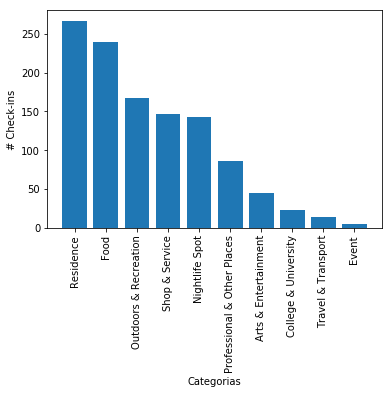

In [11]:
plt.bar(categories_total.keys(), categories_total)
plt.xticks(rotation=90)
plt.xlabel("Categorias")
plt.ylabel("# Check-ins")

### E quais são as subcategorias?

In [12]:
subcat_total = pd.value_counts(fln_df["VENUE CATEGORY NAME"], sort = True).head(20)
subcat_total

Home (private)                              193
Shopping Mall                                64
Bar                                          62
Residential Building (Apartment / Condo)     62
Restaurant                                   36
City                                         35
Burger Joint                                 29
Hot Dog Joint                                25
Neighborhood                                 25
Soccer Field                                 24
Lounge                                       20
Fast Food Restaurant                         20
Auto Garage                                  18
Beach                                        17
Pizza Place                                  17
Gym / Fitness Center                         15
General Entertainment                        15
Nightclub                                    13
Gym                                          13
Office                                       13
Name: VENUE CATEGORY NAME, dtype: int64

In [13]:
rcParams['figure.figsize'] = 10, 5

Text(0,0.5,'# Check-ins')

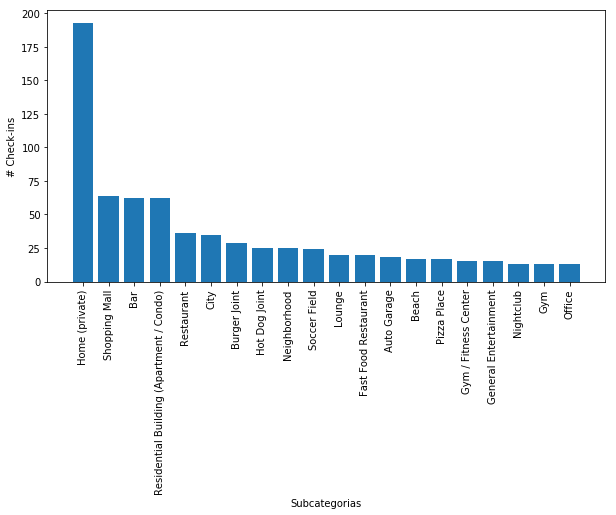

In [14]:
plt.bar(subcat_total.keys(), subcat_total)
plt.xticks(rotation=90)
plt.xlabel("Subcategorias")
plt.ylabel("# Check-ins")

Para aprender mais sobre as **categorias e subcategorias do Foursquare**, acesse: https://developer.foursquare.com/docs/resources/categories

### Como ficariam os mapas de uma categoria específica?

In [15]:
education_df_total = fln_df.loc[fln_df['VENUE MACRO-CATEGORY NAME'] == "College & University"]
education_df_total.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
81,1484952620,-120,female,53a18653498e903f74548c26,-27.575855,-48.658130,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a0941735,College Classroom,0,0,none
124,1485783141,-120,female,55f82fdf498e2e2c8f0e12d8,-27.598584,-48.516997,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a8941735,General College & University,0,0,none
311,1488450041,-180,female,56c19764cd10e13a814240b8,-27.659656,-48.674747,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a0941735,College Classroom,0,1,none
355,1489614013,-180,female,5062ef65e4b09ae315bac813,-27.623675,-48.681414,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a0941735,College Classroom,0,5,none
364,1489702886,-180,female,5036100fe4b0a614203cd9de,-27.624382,-48.682331,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1ae941735,University,0,0,none
401,1490710367,-180,female,4fc7e6bce4b0681a476c2db7,-27.626438,-48.684648,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1b2941735,College Gym,0,26,none
425,1490915684,-180,male,4f944c13e4b0a20c2708e94d,-27.582855,-48.586296,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1ab941735,Student Center,0,3,none
524,1496276743,-180,female,51485dfee4b058b47af231dd,-27.624878,-48.680806,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d198941735,College Academic Building,0,none,none
532,1496311863,-180,male,51c311ee498e3c1e4ad312e4,-27.661646,-48.673349,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a0941735,College Classroom,0,none,none
534,1496325279,-180,male,4d6d66c9cb7a8cfaccd95e79,-27.586135,-48.504942,Florianópolis,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d198941735,College Academic Building,0,none,none


In [16]:
lats_total = education_df_total["VENUE LATITUDE"]
long_total = education_df_total["VENUE LONGITUDE"]
gmap.heatmap(lats_total, long_total)
gmap.draw("Maps/heatmap_total_education.html")

### Quais são os locais mais bem avaliados da cidade?

In [17]:
fln_df_new = fln_df.loc[fln_df['VENUE RATING'] != "none"]
fln_df_new.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1483228882,-120,female,4ce08448c4f6a35d1184d66c,-27.739711,-48.637432,Palhoça,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,112,8.2
2,1483229028,-120,female,4f91fecfe4b04c93d61a19c3,-27.628102,-48.665849,none,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d186941735,Liquor Store,0,9,7.5
3,1483229568,-120,female,5852f1e3809a770330967350,-27.437972,-48.493862,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,52e81612bcbc57f1066b7a0d,Beach Bar,0,69,8.8
5,1483241400,-120,male,4c2a3f439a559c74b4e80ce2,-27.593597,-48.559451,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11f941735,Nightclub,0,504,8.4
7,1483242706,-120,female,4d1b8a75c17ff04d6a55bf41,-27.599229,-48.430444,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,0,122,7.2
14,1483282968,-120,male,4ce08448c4f6a35d1184d66c,-27.739711,-48.637432,Palhoça,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,112,8.2
15,1483283056,-120,female,4b66095df964a520f50f2be3,-27.590299,-48.515101,Florianópolis,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,0,2802,8.5
18,1483289471,-120,female,5113a37ce4b010ed9432aaf5,-27.378237,-48.533087,Governador Celso Ramos,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,47,8.7
19,1483312395,-120,female,559c794c498ebd10c809b646,-27.642594,-48.694824,Madri,Brazil,4d4b7105d754a06374d81259,Food,52e81612bcbc57f1066b79f2,Creperie,0,6,7.0
23,1483406203,-120,male,582e219dd22e7b70216958fb,-27.437620,-48.403210,none,Brazil,4d4b7105d754a06374d81259,Food,5744ccdfe4b0c0459246b4e2,Pastry Shop,0,22,7.5


In [18]:
fln_df_new = fln_df_new.sort_values("VENUE RATING", ascending = False)
fln_df_new.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
151,1485908947,-120,none,537a7ec4498e043d38100957,-27.605183,-48.576993,Florianópolis,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d175941735,Gym / Fitness Center,0,97,9.2
201,1486743597,-120,female,4e9506a3e5fa809748c79bf7,-27.378171,-48.629400,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,50aa9e094b90af0d42d5de0d,City,0,61,9.1
173,1486048308,-120,female,4e9506a3e5fa809748c79bf7,-27.378171,-48.629400,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,50aa9e094b90af0d42d5de0d,City,0,61,9.1
256,1488131591,-180,female,4e9506a3e5fa809748c79bf7,-27.378171,-48.629400,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,50aa9e094b90af0d42d5de0d,City,0,61,9.1
289,1488326507,-180,female,4c15588ea1010f4753eb4d18,-27.597323,-48.611264,São José,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16f941735,Hot Dog Joint,0,314,9.0
444,1493670676,-180,female,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
369,1489869635,-180,male,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
403,1490816984,-180,female,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
232,1487534098,-180,female,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
78,1484941785,-120,female,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9


In [19]:
fln_ranking = fln_df_new.drop_duplicates("VENUE ID").copy()
fln_ranking.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
151,1485908947,-120,none,537a7ec4498e043d38100957,-27.605183,-48.576993,Florianópolis,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d175941735,Gym / Fitness Center,0,97,9.2
201,1486743597,-120,female,4e9506a3e5fa809748c79bf7,-27.378171,-48.629400,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,50aa9e094b90af0d42d5de0d,City,0,61,9.1
289,1488326507,-180,female,4c15588ea1010f4753eb4d18,-27.597323,-48.611264,São José,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16f941735,Hot Dog Joint,0,314,9.0
444,1493670676,-180,female,4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
183,1486323836,-120,male,5852f1e3809a770330967350,-27.437972,-48.493862,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,52e81612bcbc57f1066b7a0d,Beach Bar,0,69,8.8
238,1487805730,-180,female,4bba8cca935e9521db522890,-27.584944,-48.545248,Florianópolis,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,0,3560,8.8
179,1486248377,-120,male,57d85e65498e9a22c5680d0f,-27.586277,-48.581700,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c4941735,Restaurant,0,16,8.8
73,1484846204,-120,female,5113a37ce4b010ed9432aaf5,-27.378237,-48.533087,Governador Celso Ramos,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,47,8.7
170,1486000771,-120,female,586a75883e9dfb7b455cac06,-27.731523,-48.640753,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,0,12,8.6
136,1485808928,-120,female,4fca3b166d862bb6a5cdc696,-27.307477,-48.549999,Governador Celso Ramos,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d176941735,Gym,0,33,8.6


In [20]:
pd.set_option('display.max_colwidth', -1)

In [21]:
fln_ranking_venue_id_links = "https://pt.foursquare.com/v/" + fln_ranking.loc[:, "VENUE ID"].astype(str)

In [22]:
fln_ranking.loc[:, "VENUE ID"] = fln_ranking_venue_id_links.values
fln_ranking.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
151,1485908947,-120,none,https://pt.foursquare.com/v/537a7ec4498e043d38100957,-27.605183,-48.576993,Florianópolis,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d175941735,Gym / Fitness Center,0,97,9.2
201,1486743597,-120,female,https://pt.foursquare.com/v/4e9506a3e5fa809748c79bf7,-27.378171,-48.629400,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,50aa9e094b90af0d42d5de0d,City,0,61,9.1
289,1488326507,-180,female,https://pt.foursquare.com/v/4c15588ea1010f4753eb4d18,-27.597323,-48.611264,São José,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16f941735,Hot Dog Joint,0,314,9.0
444,1493670676,-180,female,https://pt.foursquare.com/v/4f2bcf32e4b09e391d0e3aeb,-27.514595,-48.514875,Florianópolis,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1bc941735,Cupcake Shop,0,680,8.9
183,1486323836,-120,male,https://pt.foursquare.com/v/5852f1e3809a770330967350,-27.437972,-48.493862,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,52e81612bcbc57f1066b7a0d,Beach Bar,0,69,8.8
238,1487805730,-180,female,https://pt.foursquare.com/v/4bba8cca935e9521db522890,-27.584944,-48.545248,Florianópolis,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,0,3560,8.8
179,1486248377,-120,male,https://pt.foursquare.com/v/57d85e65498e9a22c5680d0f,-27.586277,-48.581700,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c4941735,Restaurant,0,16,8.8
73,1484846204,-120,female,https://pt.foursquare.com/v/5113a37ce4b010ed9432aaf5,-27.378237,-48.533087,Governador Celso Ramos,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d1e2941735,Beach,0,47,8.7
170,1486000771,-120,female,https://pt.foursquare.com/v/586a75883e9dfb7b455cac06,-27.731523,-48.640753,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,0,12,8.6
136,1485808928,-120,female,https://pt.foursquare.com/v/4fca3b166d862bb6a5cdc696,-27.307477,-48.549999,Governador Celso Ramos,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d176941735,Gym,0,33,8.6


In [23]:
night_df_total = fln_ranking.loc[fln_ranking['VENUE MACRO-CATEGORY NAME'] == "Nightlife Spot"]
night_df_total.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
183,1486323836,-120,male,https://pt.foursquare.com/v/5852f1e3809a770330967350,-27.437972,-48.493862,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,52e81612bcbc57f1066b7a0d,Beach Bar,0,69,8.8
5,1483241400,-120,male,https://pt.foursquare.com/v/4c2a3f439a559c74b4e80ce2,-27.593597,-48.559451,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11f941735,Nightclub,0,504,8.4
240,1487820111,-180,male,https://pt.foursquare.com/v/566cba25498ec4716a7cb3ed,-27.651293,-48.670664,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d118941735,Dive Bar,0,18,8.4
476,1495070645,-180,female,https://pt.foursquare.com/v/5286c28211d27a62a14cbdb6,-27.622979,-48.678720,Palhoça,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11b941735,Pub,0,209,8.3
365,1489706219,-180,female,https://pt.foursquare.com/v/56bbb102498e82fc5350acbf,-27.579444,-48.599997,none,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,0,12,7.6
453,1494031917,-180,female,https://pt.foursquare.com/v/4dfbd2eca809d61e2fbdd09f,-27.609161,-48.442236,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,0,38,7.4
7,1483242706,-120,female,https://pt.foursquare.com/v/4d1b8a75c17ff04d6a55bf41,-27.599229,-48.430444,Florianópolis,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,0,122,7.2
